<a href="https://colab.research.google.com/github/srilalithaveerubhotla/CMPE_258/blob/master/Multi_layer_perceptron_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Basic Multi Layer Perceptron using Just Numpy to build from scratch on MNIST** 
## Below are few points that I focused on this notebook
### 1.   **Stochastic gradient descent**
### 2.   **Mini batch gradient descent**
### 3.   **Drop-Out**
### 4.   **Data Argumentation**
### 5.   **Many Layers & many Neurons**
### 6.   **Best Activations Functions**
### 7.   **Normalising Inputs also Weights (Batch Norm)**
### 8.   **Adaptive Learning Rates**
### 9.   **Train & Test Accuracy**
### 10.  **Best and worst Error Moments**
### 11.  **What Auto ML Said ????**

In [0]:
from keras import datasets
import reprlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import pyplot

import tensorflow as tf
from tqdm import trange
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.image import ImageDataGenerator

In [0]:
def load_dataset():

  (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

  images,labels =(X_train[0:1000].reshape(1000,28*28)/255,y_train[0:1000]) # Normalising the Train data with 255
  one_hot_labels =np.zeros((len(labels),10))
  for i,l in enumerate(labels):
    one_hot_labels[i][l]=l
  labels=one_hot_labels
  test_images =X_test.reshape(len(X_test),28*28)/255 #  Normalising the Test data with 255
  test_labels =np.zeros((len(y_test),10))
  for i,l in enumerate(y_test):
    test_labels[i][l]=l
  return X_train,y_train,X_test,y_test,images,labels,test_images,test_labels

11493376/11490434 [==============================] - 1s 0us/step
Train X shape... (60000, 28, 28)
Train y shape... (60000,)
Test X shape... (10000, 28, 28)
Test y shape... (10000,)


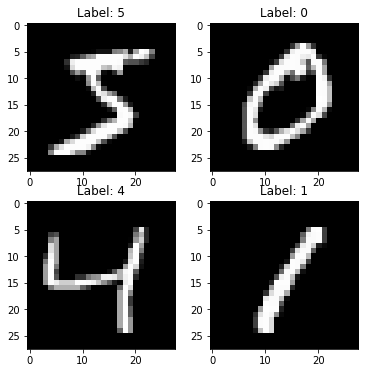

In [3]:
X_train,y_train,X_test,y_test,images,labels,test_images,test_labels=load_dataset()
plt.figure(figsize=[6,6])
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.title("Label: %i"%y_train[i])
  plt.imshow(X_train[i].reshape([28,28]),cmap='gray')
print('Train X shape...', X_train.shape)
print('Train y shape...', y_train.shape)
print('Test X shape...', X_test.shape)
print('Test y shape...', y_test.shape)

In [0]:
def Relu(x):
  return (x>0)*x 

In [0]:
def DeriveRelu(output):
  return output >=0
  

In [0]:
alpha=0.001
iterations=300
hidden_size=120
pixel_per_image=784
num_labels=10

In [0]:
weights_0_1=0.2*np.random.random((pixel_per_image,hidden_size))-0.1
weights_1_2=0.2*np.random.random((hidden_size,num_labels))-0.1

In [8]:
for j in range(iterations):
  error,correct_cnt =(0.0,0)
  for i in range(len(images)):
    layer_0=images[i:i+1]
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error +=np.sum((labels[i:i+1]-layer_2)**2)
    correct_cnt +=int(np.argmax(layer_2)==np.argmax(labels[i:i+1]))
    layer_2_delta=(labels[i:i+1]-layer_2)
    layer_1_delta=layer_2_delta.dot(weights_1_2.T)*DeriveRelu(layer_1)
    weights_1_2 +=alpha*layer_1.T.dot(layer_2_delta)
    weights_0_1+=alpha*layer_0.T.dot(layer_1_delta)
  print('Train error- '+str(error/float(len(images)))[0:5]+' '+' Train accuracy- '+str(correct_cnt/float(len(images))))


Train error- 19.72  Train accuracy- 0.341
Train error- 13.67  Train accuracy- 0.492
Train error- 11.67  Train accuracy- 0.57
Train error- 10.56  Train accuracy- 0.61
Train error- 9.820  Train accuracy- 0.634
Train error- 9.260  Train accuracy- 0.655
Train error- 8.812  Train accuracy- 0.676
Train error- 8.439  Train accuracy- 0.691
Train error- 8.117  Train accuracy- 0.703
Train error- 7.835  Train accuracy- 0.717
Train error- 7.587  Train accuracy- 0.731
Train error- 7.365  Train accuracy- 0.738
Train error- 7.166  Train accuracy- 0.752
Train error- 6.986  Train accuracy- 0.755
Train error- 6.821  Train accuracy- 0.759
Train error- 6.671  Train accuracy- 0.761
Train error- 6.533  Train accuracy- 0.767
Train error- 6.406  Train accuracy- 0.772
Train error- 6.289  Train accuracy- 0.773
Train error- 6.181  Train accuracy- 0.775
Train error- 6.081  Train accuracy- 0.777
Train error- 5.989  Train accuracy- 0.781
Train error- 5.901  Train accuracy- 0.782
Train error- 5.819  Train accuracy- 

In [9]:
if (j%10==0 or j == iterations-1):
  error,correct_cnt =(0.0,0)
  for i in range(len(test_images)):
    layer_0=test_images[i:i+1]
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error+=np.sum((test_labels[i:i+1]-layer_2) **2)
    correct_cnt+=int(np.argmax(layer_2)==np.argmax(test_labels[i:i+1]))
    print(reprlib.repr('Test error- '+str(error/float(len(test_images)))[0:5]+' '+"Test accuracy- "+str(correct_cnt/float(len(test_images)))))

Streaming output truncated to the last 5000 lines.
'Test error- ...uracy- 0.2378'
'Test error- ...uracy- 0.2379'
'Test error- ...curacy- 0.238'
'Test error- ...uracy- 0.2381'
'Test error- ...uracy- 0.2381'
'Test error- ...uracy- 0.2381'
'Test error- ...uracy- 0.2382'
'Test error- ...uracy- 0.2382'
'Test error- ...uracy- 0.2383'
'Test error- ...uracy- 0.2384'
'Test error- ...uracy- 0.2385'
'Test error- ...uracy- 0.2386'
'Test error- ...uracy- 0.2386'
'Test error- ...uracy- 0.2386'
'Test error- ...uracy- 0.2386'
'Test error- ...uracy- 0.2387'
'Test error- ...uracy- 0.2388'
'Test error- ...uracy- 0.2389'
'Test error- ...uracy- 0.2389'
'Test error- ...curacy- 0.239'
'Test error- ...uracy- 0.2391'
'Test error- ...uracy- 0.2392'
'Test error- ...uracy- 0.2393'
'Test error- ...uracy- 0.2394'
'Test error- ...uracy- 0.2394'
'Test error- ...uracy- 0.2395'
'Test error- ...uracy- 0.2395'
'Test error- ...uracy- 0.2395'
'Test error- ...uracy- 0.2396'
'Test error- ...uracy- 0.2397'
'Test error- ...ura

# Code With Dropout

In [10]:
for j in range(iterations):
  error,correct_cnt =(0.0,0)
  for i in range(len(images)):
    layer_0=images[i:i+1]
    dropout_mask=np.random.randint(8,size=layer_1.shape)
    layer_1*=dropout_mask*8
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error +=np.sum((labels[i:i+1]-layer_2)**2)
    correct_cnt +=int(np.argmax(layer_2)==np.argmax(labels[i:i+1]))
    layer_2_delta=(labels[i:i+1]-layer_2)
    layer_1_delta=layer_2_delta.dot(weights_1_2.T)*DeriveRelu(layer_1)

    layer_1_delta*=dropout_mask
    weights_1_2 +=alpha*layer_1.T.dot(layer_2_delta)
    weights_0_1+=alpha*layer_0.T.dot(layer_1_delta)
  print('Train error- '+str(error/float(len(images)))[0:5]+' '+' Train accuracy- '+str(correct_cnt/float(len(images))))

Train error- 53.00  Train accuracy- 0.415
Train error- 13.12  Train accuracy- 0.618
Train error- 12.34  Train accuracy- 0.644
Train error- 10.27  Train accuracy- 0.66
Train error- 9.637  Train accuracy- 0.688
Train error- 8.646  Train accuracy- 0.71
Train error- 8.571  Train accuracy- 0.72
Train error- 9.011  Train accuracy- 0.721
Train error- 8.082  Train accuracy- 0.746
Train error- 8.335  Train accuracy- 0.728
Train error- 8.711  Train accuracy- 0.722
Train error- 7.989  Train accuracy- 0.697
Train error- 8.295  Train accuracy- 0.721
Train error- 8.108  Train accuracy- 0.72
Train error- 7.989  Train accuracy- 0.708
Train error- 7.873  Train accuracy- 0.715
Train error- 7.852  Train accuracy- 0.722
Train error- 8.205  Train accuracy- 0.706
Train error- 8.879  Train accuracy- 0.728
Train error- 9.040  Train accuracy- 0.735
Train error- 7.154  Train accuracy- 0.749
Train error- 6.934  Train accuracy- 0.75
Train error- 7.097  Train accuracy- 0.752
Train error- 6.771  Train accuracy- 0.7

In [11]:
if (j%10==0 or j == iterations-1):
  error,correct_cnt =(0.0,0)
  for i in range(len(test_images)):
    layer_0=test_images[i:i+1]
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error+=np.sum((test_labels[i:i+1]-layer_2) **2)
    correct_cnt+=int(np.argmax(layer_2)==np.argmax(test_labels[i:i+1]))
    print('Test error- '+str(error/float(len(test_images)))[0:5]+' '+"Test accuracy- "+str(correct_cnt/float(len(test_images))))

Streaming output truncated to the last 5000 lines.
Test error- 8.842 Test accuracy- 0.2708
Test error- 8.843 Test accuracy- 0.2709
Test error- 8.843 Test accuracy- 0.271
Test error- 8.846 Test accuracy- 0.2711
Test error- 8.846 Test accuracy- 0.2711
Test error- 8.847 Test accuracy- 0.2711
Test error- 8.848 Test accuracy- 0.2712
Test error- 8.848 Test accuracy- 0.2712
Test error- 8.854 Test accuracy- 0.2712
Test error- 8.855 Test accuracy- 0.2713
Test error- 8.856 Test accuracy- 0.2714
Test error- 8.857 Test accuracy- 0.2715
Test error- 8.857 Test accuracy- 0.2716
Test error- 8.858 Test accuracy- 0.2716
Test error- 8.866 Test accuracy- 0.2716
Test error- 8.868 Test accuracy- 0.2717
Test error- 8.872 Test accuracy- 0.2718
Test error- 8.874 Test accuracy- 0.2719
Test error- 8.875 Test accuracy- 0.2719
Test error- 8.876 Test accuracy- 0.272
Test error- 8.876 Test accuracy- 0.2721
Test error- 8.878 Test accuracy- 0.2722
Test error- 8.879 Test accuracy- 0.2723
Test error- 8.882 Test accuracy

#Mini-Batch Gradient Descent

In [18]:
batch_size=1000
alpha=0.5
for j in range(iterations):
  error,correct_cnt=(0.0,0)
  for i in range(int(len(images)/ batch_size)):
    batch_start, batch_end =((i*batch_size),((i+1)*batch_size))
    #print(batch_start,batch_end)
    layer_0=images[batch_start:batch_end]
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error +=np.sum((labels[batch_start:batch_end]-layer_2)**2)
    for k in range(batch_size):
      correct_cnt +=int(np.argmax(layer_2[k:k+1])==np.argmax(labels[batch_start:batch_end]))
      layer_2_delta=(labels[batch_start:batch_end]-layer_2)
      layer_1_delta=layer_2_delta.dot(weights_1_2.T)*DeriveRelu(layer_1)
      weights_1_2 +=alpha*layer_1.T.dot(layer_2_delta)
      weights_0_1+=alpha*layer_0.T.dot(layer_1_delta)
  print('Train error- '+str(error/float(len(images)))[0:5]+' '+' Train accuracy- '+str(correct_cnt/float(len(images))))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


Train error- nan  Train accuracy- 0.0


KeyboardInterrupt: ignored

In [0]:
if (j%10==0 or j == iterations-1):
  error,correct_cnt =(0.0,0)
  for i in range(len(test_images)):
    layer_0=test_images[i:i+1]
    layer_1=relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error+=np.sum((test_labels[i:i+1]-layer_2) **2)
    correct_cnt+=int(np.argmax(layer_2)==np.argmax(test_labels[i:i+1]))
    print('Test error- '+str(error/float(len(test_images)))[0:5]+' '+"Test accuracy- "+str(correct_cnt/float(len(test_images))))

## Data Argumentation
### Feature standardisation

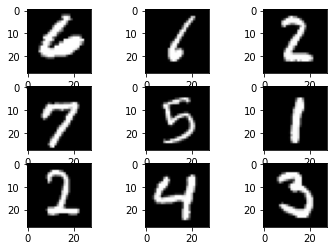

In [24]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
datagenarat = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagenarat.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagenarat.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


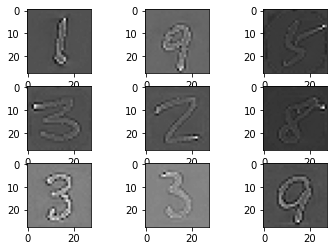

In [25]:
datagenarat = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagenarat.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagenarat.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [26]:
for j in range(iterations):
  error,correct_cnt =(0.0,0)
  for i in range(len(images)):
    layer_0=images[i:i+1]
    layer_1=Relu(np.dot(layer_0,weights_0_1))
    layer_2=np.dot(layer_1,weights_1_2)
    error +=np.sum((labels[i:i+1]-layer_2)**2)
    correct_cnt +=int(np.argmax(layer_2)==np.argmax(labels[i:i+1]))
    layer_2_delta=(labels[i:i+1]-layer_2)
    layer_1_delta=layer_2_delta.dot(weights_1_2.T)*DeriveRelu(layer_1)
    weights_1_2 +=alpha*layer_1.T.dot(layer_2_delta)
    weights_0_1+=alpha*layer_0.T.dot(layer_1_delta)
  print('Train error- '+str(error/float(len(images)))[0:5]+' '+' Train accuracy- '+str(correct_cnt/float(len(images))))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
Train error- nan  Train accuracy- 0.097
